1. Import Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
    

2. Define Paths

In [2]:

train_path = './data/data_train.csv'
test_path = './data/data_test.csv'
predictions_path = './data/s4000577_predictions_random_forest.csv'
    

3. Load Data

In [3]:

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
    

4. Preprocess Data

In [4]:

x_train = train_df.drop(columns=['Id', 'Status'])
y_train = train_df['Status']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), x_train.columns)
    ])
    

5. Define Model Pipeline

In [5]:

pipeline = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
    

6. Split Data

In [6]:

x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    

7. Fit Model

In [7]:

pipeline.fit(x_train_sub, y_train_sub)
    

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'ExtraMedTest', 'ExtraAlcoholTest'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

8. Validation Predictions

In [8]:

y_val_pred = pipeline.predict(x_val)
    

9. Performance Metrics

In [9]:

val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_report = classification_report(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", val_classification_report)
    

Validation Accuracy: 0.9579442706151913
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     33427
           1       0.97      0.79      0.87      7162

    accuracy                           0.96     40589
   macro avg       0.96      0.89      0.92     40589
weighted avg       0.96      0.96      0.96     40589



10. Plot Metrics

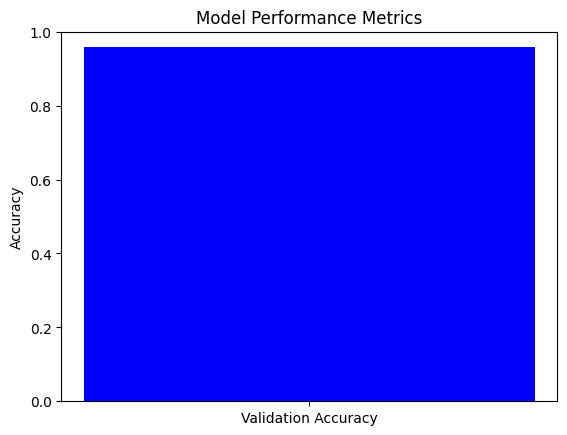

In [10]:

plt.bar(['Validation Accuracy'], [val_accuracy], color='blue')
plt.ylim(0, 1)  # For better visibility
plt.ylabel('Accuracy')
plt.title('Model Performance Metrics')
plt.show()
    

11. Cross-Validation

In [11]:

cv_scores = cross_val_score(pipeline, x_train, y_train, cv=5)
print("Cross-validation scores mean:", cv_scores.mean())
    

Cross-validation scores mean: 0.9592104191278643


12. Test Predictions

In [12]:

x_test = test_df.drop(columns=['Id', 'Status'])
predicted_status = pipeline.predict(x_test)
test_df['Status'] = predicted_status
    

13. Save Predictions

In [13]:

test_df[['Id', 'Status']].to_csv(predictions_path, index=False)
    